# JDK and Spark installation

1.   Install the JDK 
2.   Download Apache Spark 
3.   Install the required Python packages (findspark, pyspark)
4.   Use Spark - configurations...



In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 21.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=9b8796679aa8b613143289dd6a1e655918986c0132d5c807d7c539295a1a5e35
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# Acutal Programme

In [ ]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *
# Import `DenseVector`
from pyspark.ml.linalg import DenseVector

# Import `StandardScaler` 
from pyspark.ml.feature import StandardScaler

In [ ]:
spark = SparkSession.builder \
   .master("local") \
   .appName("Tutorial") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()

In [ ]:
sc = spark.sparkContext

In [ ]:
data = [num for num in range(1,10)]
print(data)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
myRDD = sc.parallelize(data)

In [ ]:
myRDD

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:262

In [ ]:
print(myRDD.collect())

In [ ]:
myRDD.count()

9

In [ ]:
kv = [('a',7), ('a', 2), ('b', 2), ('b',4), ('c',1), ('c',2), ('c',3), ('c',4)]

In [ ]:
rdd2 = sc.parallelize(kv)
print(rdd2.collect())

[('a', 7), ('a', 2), ('b', 2), ('b', 4), ('c', 1), ('c', 2), ('c', 3), ('c', 4)]


In [ ]:
rdd3 = rdd2.reduceByKey(lambda x, y: x + y)

In [ ]:
print(rdd3.collect())

[('a', 9), ('b', 6), ('c', 10)]


In [ ]:
rdd4 = rdd2.groupByKey()

In [ ]:
print(rdd4.collect())

[('a', <pyspark.resultiterable.ResultIterable object at 0x7fe9b14e7b20>), ('b', <pyspark.resultiterable.ResultIterable object at 0x7fe9b13246d0>), ('c', <pyspark.resultiterable.ResultIterable object at 0x7fe9b13245b0>)]


In [ ]:
rdd5 = rdd4.map(lambda x: (x[0], list(x[1])))
print(rdd5.collect())

[('a', [7, 2]), ('b', [2, 4]), ('c', [1, 2, 3, 4])]


In [ ]:
!wget https://raw.githubusercontent.com/shiv1994/COMP6940-2022/main/lab6/cal_housing.data
!wget https://raw.githubusercontent.com/shiv1994/COMP6940-2022/main/lab6/cal_housing.domain 

--2023-03-01 21:43:09--  https://raw.githubusercontent.com/shiv1994/COMP6940-2022/main/lab6/cal_housing.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2071484 (2.0M) [text/plain]
Saving to: ‘cal_housing.data’

cal_housing.data    100%[===================>]   1.97M  --.-KB/s    in 0.06s   

2023-03-01 21:43:09 (31.6 MB/s) - ‘cal_housing.data’ saved [2071484/2071484]

--2023-03-01 21:43:09--  https://raw.githubusercontent.com/shiv1994/COMP6940-2022/main/lab6/cal_housing.domain
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23

In [ ]:
rdd = sc.textFile('cal_housing.data')
header = sc.textFile('cal_housing.domain')

In [ ]:
header.collect()

['longitude: continuous.',
 'latitude: continuous.',
 'housingMedianAge: continuous. ',
 'totalRooms: continuous. ',
 'totalBedrooms: continuous. ',
 'population: continuous. ',
 'households: continuous. ',
 'medianIncome: continuous. ',
 'medianHouseValue: continuous. ']

In [ ]:
rdd.take(5)

['-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000',
 '-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000',
 '-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000',
 '-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000',
 '-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000']

In [ ]:
list(map(float, '-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000'.split(',')))

[-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, 452600.0]

In [ ]:
rdd = rdd.map(lambda entry: list(map(float, entry.split(','))))

In [ ]:
rdd.take(2)

[[-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, 452600.0],
 [-122.22, 37.86, 21.0, 7099.0, 1106.0, 2401.0, 1138.0, 8.3014, 358500.0]]

In [ ]:
header.collect()

['longitude: continuous.',
 'latitude: continuous.',
 'housingMedianAge: continuous. ',
 'totalRooms: continuous. ',
 'totalBedrooms: continuous. ',
 'population: continuous. ',
 'households: continuous. ',
 'medianIncome: continuous. ',
 'medianHouseValue: continuous. ']

In [ ]:
def f(**kwargs):
  for k, v in kwargs.items():
    print(v, '---> ', k)

In [ ]:
f(A=2, B=3)

2 --->  A
3 --->  B


In [ ]:
d = {'A': 2, 'B': 3}
f(**d)

2 --->  A
3 --->  B


In [ ]:
list(header.collect())

['longitude: continuous.',
 'latitude: continuous.',
 'housingMedianAge: continuous. ',
 'totalRooms: continuous. ',
 'totalBedrooms: continuous. ',
 'population: continuous. ',
 'households: continuous. ',
 'medianIncome: continuous. ',
 'medianHouseValue: continuous. ']

In [ ]:
header_names = header.map(lambda x: x.split(':')).map(lambda x: x[0].strip())
header_names = (header_names.collect())


In [ ]:
def create_row_from_list(line):
  return Row(longitude=line[0], latitude=line[1],housingMedianAge=line[2], totalRooms=line[3], 
             totalBedrooms=line[4], population=line[5], households=line[6], medianIncome=line[7], medianHouseValue=line[8])
  # line_desc = zip(list(header.collect()), line)
  # print(line_desc)
  # return Row(line_desc)

  
new_rdd = rdd.map(create_row_from_list) 

In [ ]:
new_rdd.collect()

[Row(longitude=-122.23, latitude=37.88, housingMedianAge=41.0, totalRooms=880.0, totalBedrooms=129.0, population=322.0, households=126.0, medianIncome=8.3252, medianHouseValue=452600.0),
 Row(longitude=-122.22, latitude=37.86, housingMedianAge=21.0, totalRooms=7099.0, totalBedrooms=1106.0, population=2401.0, households=1138.0, medianIncome=8.3014, medianHouseValue=358500.0),
 Row(longitude=-122.24, latitude=37.85, housingMedianAge=52.0, totalRooms=1467.0, totalBedrooms=190.0, population=496.0, households=177.0, medianIncome=7.2574, medianHouseValue=352100.0),
 Row(longitude=-122.25, latitude=37.85, housingMedianAge=52.0, totalRooms=1274.0, totalBedrooms=235.0, population=558.0, households=219.0, medianIncome=5.6431, medianHouseValue=341300.0),
 Row(longitude=-122.25, latitude=37.85, housingMedianAge=52.0, totalRooms=1627.0, totalBedrooms=280.0, population=565.0, households=259.0, medianIncome=3.8462, medianHouseValue=342200.0),
 Row(longitude=-122.25, latitude=37.85, housingMedianAge=5

In [ ]:
df = new_rdd.toDF()

In [ ]:
df.show()

+---------+--------+----------------+----------+-------------+----------+----------+------------+----------------+
|longitude|latitude|housingMedianAge|totalRooms|totalBedrooms|population|households|medianIncome|medianHouseValue|
+---------+--------+----------------+----------+-------------+----------+----------+------------+----------------+
|  -122.23|   37.88|            41.0|     880.0|        129.0|     322.0|     126.0|      8.3252|        452600.0|
|  -122.22|   37.86|            21.0|    7099.0|       1106.0|    2401.0|    1138.0|      8.3014|        358500.0|
|  -122.24|   37.85|            52.0|    1467.0|        190.0|     496.0|     177.0|      7.2574|        352100.0|
|  -122.25|   37.85|            52.0|    1274.0|        235.0|     558.0|     219.0|      5.6431|        341300.0|
|  -122.25|   37.85|            52.0|    1627.0|        280.0|     565.0|     259.0|      3.8462|        342200.0|
|  -122.25|   37.85|            52.0|     919.0|        213.0|     413.0|     19

In [ ]:
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housingMedianAge: double (nullable = true)
 |-- totalRooms: double (nullable = true)
 |-- totalBedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- medianIncome: double (nullable = true)
 |-- medianHouseValue: double (nullable = true)



In [ ]:
df.select('longitude', 'latitude').show(20)

+---------+--------+
|longitude|latitude|
+---------+--------+
|  -122.23|   37.88|
|  -122.22|   37.86|
|  -122.24|   37.85|
|  -122.25|   37.85|
|  -122.25|   37.85|
|  -122.25|   37.85|
|  -122.25|   37.84|
|  -122.25|   37.84|
|  -122.26|   37.84|
|  -122.25|   37.84|
|  -122.26|   37.85|
|  -122.26|   37.85|
|  -122.26|   37.85|
|  -122.26|   37.84|
|  -122.26|   37.85|
|  -122.26|   37.85|
|  -122.27|   37.85|
|  -122.27|   37.85|
|  -122.26|   37.84|
|  -122.27|   37.84|
+---------+--------+
only showing top 20 rows



In [ ]:
df = df.withColumn('roomsPerHousehold', col('totalRooms') / col('households'))

In [ ]:
df.show()

+---------+--------+----------------+----------+-------------+----------+----------+------------+----------------+------------------+
|longitude|latitude|housingMedianAge|totalRooms|totalBedrooms|population|households|medianIncome|medianHouseValue| roomsPerHousehold|
+---------+--------+----------------+----------+-------------+----------+----------+------------+----------------+------------------+
|  -122.23|   37.88|            41.0|     880.0|        129.0|     322.0|     126.0|      8.3252|        452600.0| 6.984126984126984|
|  -122.22|   37.86|            21.0|    7099.0|       1106.0|    2401.0|    1138.0|      8.3014|        358500.0| 6.238137082601054|
|  -122.24|   37.85|            52.0|    1467.0|        190.0|     496.0|     177.0|      7.2574|        352100.0| 8.288135593220339|
|  -122.25|   37.85|            52.0|    1274.0|        235.0|     558.0|     219.0|      5.6431|        341300.0|5.8173515981735155|
|  -122.25|   37.85|            52.0|    1627.0|        280.0|

In [ ]:
df.groupBy('housingMedianAge').count().sort('count', ascending=False).show()

+----------------+-----+
|housingMedianAge|count|
+----------------+-----+
|            52.0| 1273|
|            36.0|  862|
|            35.0|  824|
|            16.0|  771|
|            17.0|  698|
|            34.0|  689|
|            26.0|  619|
|            33.0|  615|
|            18.0|  570|
|            25.0|  566|
|            32.0|  565|
|            37.0|  537|
|            15.0|  512|
|            19.0|  502|
|            27.0|  488|
|            24.0|  478|
|            30.0|  476|
|            28.0|  471|
|            20.0|  465|
|            29.0|  461|
+----------------+-----+
only showing top 20 rows



In [ ]:
!wget https://raw.githubusercontent.com/piotrszul/spark-tutorial/master/data/artwar.1b.txt

--2023-03-01 22:15:04--  https://raw.githubusercontent.com/piotrszul/spark-tutorial/master/data/artwar.1b.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63371 (62K) [text/plain]
Saving to: ‘artwar.1b.txt’

artwar.1b.txt       100%[===================>]  61.89K  --.-KB/s    in 0.01s   

2023-03-01 22:15:04 (5.54 MB/s) - ‘artwar.1b.txt’ saved [63371/63371]



In [ ]:
%%sh

echo "BEGINNING:"
head -n 22 'artwar.1b.txt' | tail -n 10
echo 
echo "ENDING:"
tail -n 20 'artwar.1b.txt' | head -n 12

BEGINNING:

Translated by Lionel Giles

I. Laying Plans

1. Sun Tzu said: The art of war is of vital importance to the State.

2. It is a matter of life and death, a road either to safety or to
ruin. Hence it is a subject of inquiry which can on no account be
neglected. 

ENDING:

27. Hence it is only the enlightened ruler and the wise general who
will use the highest intelligence of the army for purposes of spying
and thereby they achieve great results. Spies are a most important
element in water, because on them depends an army's ability to move.

THE END

----------------------------------------------------------------------

Copyright statement:
The Internet Classics Archive by Daniel C. Stevenson, Web Atomics.


In [ ]:
art_of_war = sc.textFile('/content/artwar.1b.txt')

In [ ]:
art_of_war.take(30)

['',
 '<BASE HREF="http://classics.mit.edu/Tzu/artwar.1b.txt"><table border=1 width=100%><tr><td><table border=1 bgcolor=#ffffff cellpadding=10 cellspacing=0 width=100% color=#ffffff><tr><td><font face=arial,sans-serif color=black size=-1>This is <b><font color=#0039b6>G</font><font color=#c41200>o</font><font color=#f3c518>o</font><font color=#0039b6>g</font><font color=#30a72f>l</font><font color=#c41200>e</font></b>\'s <a href="http://www.google.com/intl/en_extra/help/features.html#cached">cache</a> of <A HREF="http://classics.mit.edu/Tzu/artwar.1b.txt"><font color=blue>classics.mit.edu/Tzu/artwar.1b.txt</font></a>.<br>',
 "<b><font color=#0039b6>G</font><font color=#c41200>o</font><font color=#f3c518>o</font><font color=#0039b6>g</font><font color=#30a72f>l</font><font color=#c41200>e</font></b>'s cache is the snapshot that we took of the page as we crawled the web.<br>",
 'The page may have changed since that time.  Click here for the <A HREF="http://classics.mit.edu/Tzu/artwar.1b

In [ ]:
import re

def is_chapter_heading(line):
  match_group = (re.match(r'^[IVX]+\.', line))
  return match_group is not None 

chapter_headings = art_of_war.filter(is_chapter_heading)


In [ ]:
chapter_headings.collect()

['I. Laying Plans',
 'II. Waging War',
 'III. Attack by Stratagem',
 'IV. Tactical Dispositions',
 'V. Energy',
 'VI. Weak Points and Strong',
 'VII. Maneuvering',
 'VIII. Variation in Tactics',
 'IX. The Army on the March',
 'X. Terrain',
 'XI. The Nine Situations',
 'XII. The Attack by Fire',
 'XIII. The Use of Spies']

In [ ]:
art_of_war = art_of_war.filter(lambda x: '<' not in x and len(x)> 0)

In [ ]:
words = art_of_war.flatMap(lambda line: map(lambda y: y.lower(), line.split(' '))).\
  map(lambda word: (word, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda pair: -pair[1])

In [ ]:
words.take(10)

[('the', 696),
 ('of', 361),
 ('to', 351),
 ('', 294),
 ('and', 287),
 ('is', 262),
 ('a', 207),
 ('in', 196),
 ('be', 181),
 ('will', 117)]

In [ ]:
!wget https://raw.githubusercontent.com/piotrszul/spark-tutorial/master/data/nsw_temp.csv

--2023-03-01 22:37:33--  https://raw.githubusercontent.com/piotrszul/spark-tutorial/master/data/nsw_temp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13529567 (13M) [text/plain]
Saving to: ‘nsw_temp.csv’

nsw_temp.csv        100%[===================>]  12.90M  --.-KB/s    in 0.1s    

2023-03-01 22:37:33 (109 MB/s) - ‘nsw_temp.csv’ saved [13529567/13529567]



In [ ]:
nsw_temp = spark.read.csv('/content/nsw_temp.csv', inferSchema='True', header=True)

In [ ]:
nsw_temp.printSchema()

root
 |-- Product code: string (nullable = true)
 |-- Bureau of Meteorology station number: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Maximum temperature (Degree C): double (nullable = true)
 |-- Days of accumulation of maximum temperature: integer (nullable = true)
 |-- Quality: string (nullable = true)



In [ ]:
nsw_temp.take(10)

[Row(Product code='IDCJAC0010', Bureau of Meteorology station number=61087, Year=1965, Month=1, Day=1, Maximum temperature (Degree C)=25.6, Days of accumulation of maximum temperature=None, Quality='Y'),
 Row(Product code='IDCJAC0010', Bureau of Meteorology station number=61087, Year=1965, Month=1, Day=2, Maximum temperature (Degree C)=32.2, Days of accumulation of maximum temperature=1, Quality='Y'),
 Row(Product code='IDCJAC0010', Bureau of Meteorology station number=61087, Year=1965, Month=1, Day=3, Maximum temperature (Degree C)=23.1, Days of accumulation of maximum temperature=1, Quality='Y'),
 Row(Product code='IDCJAC0010', Bureau of Meteorology station number=61087, Year=1965, Month=1, Day=4, Maximum temperature (Degree C)=25.6, Days of accumulation of maximum temperature=1, Quality='Y'),
 Row(Product code='IDCJAC0010', Bureau of Meteorology station number=61087, Year=1965, Month=1, Day=5, Maximum temperature (Degree C)=26.7, Days of accumulation of maximum temperature=1, Qualit

In [ ]:
nsw_temp_lines = sc.textFile('/content/nsw_temp.csv')

In [ ]:
nsw_temp_lines.take(10)

['Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality',
 'IDCJAC0010,061087,1965,01,01,25.6,,Y',
 'IDCJAC0010,061087,1965,01,02,32.2,1,Y',
 'IDCJAC0010,061087,1965,01,03,23.1,1,Y',
 'IDCJAC0010,061087,1965,01,04,25.6,1,Y',
 'IDCJAC0010,061087,1965,01,05,26.7,1,Y',
 'IDCJAC0010,061087,1965,01,06,25.3,1,Y',
 'IDCJAC0010,061087,1965,01,07,20.3,1,Y',
 'IDCJAC0010,061087,1965,01,08,22.5,1,Y',
 'IDCJAC0010,061087,1965,01,09,24.2,1,Y']

In [ ]:
correct_lines = nsw_temp_lines.filter(lambda l: l.startswith('IDC'))

In [ ]:
def create_row(line):
  return Row(product=line[0], station=line[1], 
             year=(line[2]), month=line[3], day=line[4], max_temp=float(line[5]),
                      days_of_acc=(line[6]), quality=line[7])

In [ ]:
data = correct_lines.map(lambda x: x.split(',')).map(create_row)

In [ ]:
df = data.toDF()

In [ ]:
df.show()

+----------+-------+----+-----+---+--------+-----------+-------+
|   product|station|year|month|day|max_temp|days_of_acc|quality|
+----------+-------+----+-----+---+--------+-----------+-------+
|IDCJAC0010| 061087|1965|   01| 01|    25.6|           |      Y|
|IDCJAC0010| 061087|1965|   01| 02|    32.2|          1|      Y|
|IDCJAC0010| 061087|1965|   01| 03|    23.1|          1|      Y|
|IDCJAC0010| 061087|1965|   01| 04|    25.6|          1|      Y|
|IDCJAC0010| 061087|1965|   01| 05|    26.7|          1|      Y|
|IDCJAC0010| 061087|1965|   01| 06|    25.3|          1|      Y|
|IDCJAC0010| 061087|1965|   01| 07|    20.3|          1|      Y|
|IDCJAC0010| 061087|1965|   01| 08|    22.5|          1|      Y|
|IDCJAC0010| 061087|1965|   01| 09|    24.2|          1|      Y|
|IDCJAC0010| 061087|1965|   01| 10|    28.6|          1|      Y|
|IDCJAC0010| 061087|1965|   01| 11|    31.1|          1|      Y|
|IDCJAC0010| 061087|1965|   01| 12|    24.4|          1|      Y|
|IDCJAC0010| 061087|1965|

In [ ]:
df.printSchema()

root
 |-- product: string (nullable = true)
 |-- station: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- max_temp: double (nullable = true)
 |-- days_of_acc: string (nullable = true)
 |-- quality: string (nullable = true)



In [ ]:
df = spark.createDataFrame(nsw_temp.rdd, schema = ['product_id', 'station_id', 'year', 'month', 'day', 'max_temp', 'days_of_acc', 'quality'])
df.show()

+----------+----------+----+-----+---+--------+-----------+-------+
|product_id|station_id|year|month|day|max_temp|days_of_acc|quality|
+----------+----------+----+-----+---+--------+-----------+-------+
|IDCJAC0010|     61087|1965|    1|  1|    25.6|       null|      Y|
|IDCJAC0010|     61087|1965|    1|  2|    32.2|          1|      Y|
|IDCJAC0010|     61087|1965|    1|  3|    23.1|          1|      Y|
|IDCJAC0010|     61087|1965|    1|  4|    25.6|          1|      Y|
|IDCJAC0010|     61087|1965|    1|  5|    26.7|          1|      Y|
|IDCJAC0010|     61087|1965|    1|  6|    25.3|          1|      Y|
|IDCJAC0010|     61087|1965|    1|  7|    20.3|          1|      Y|
|IDCJAC0010|     61087|1965|    1|  8|    22.5|          1|      Y|
|IDCJAC0010|     61087|1965|    1|  9|    24.2|          1|      Y|
|IDCJAC0010|     61087|1965|    1| 10|    28.6|          1|      Y|
|IDCJAC0010|     61087|1965|    1| 11|    31.1|          1|      Y|
|IDCJAC0010|     61087|1965|    1| 12|    24.4| 

In [ ]:
df.groupBy('Year').avg('max_temp').sort('Year').show()

+----+------------------+
|Year|     avg(max_temp)|
+----+------------------+
|null|              null|
|1859|21.399452054794523|
|1860|20.276986301369863|
|1861|20.864657534246582|
|1862|21.353150684931535|
|1863| 20.95917808219179|
|1864|20.579452054794523|
|1865|21.692032967032958|
|1866|21.217808219178075|
|1867|21.784657534246573|
|1868|21.434246575342463|
|1869|21.035989010989006|
|1870| 20.63204419889505|
|1871|20.800000000000015|
|1872|20.673770491803285|
|1873| 20.90851648351649|
|1874| 21.04931129476586|
|1875|21.415977961432496|
|1876|21.280165289256207|
|1877| 21.39478021978022|
+----+------------------+
only showing top 20 rows



In [ ]:
df.where(col('station_id') == 61087).groupBy('Year').agg(avg('max_temp').alias('avg_max_temp'), stddev('max_temp').alias('std_max_temp')).show()

+----+------------------+------------------+
|Year|      avg_max_temp|      std_max_temp|
+----+------------------+------------------+
|1983|              null|              null|
|1972|22.601657458563547|4.7476715405402246|
|1979|              null|              null|
|2007|23.507558139534893| 4.811775021713264|
|1988|              null|              null|
|1986|              null|              null|
|1969| 22.89364640883978|5.2434143859801345|
|1967| 22.43777777777779| 5.465446338870251|
|2012|22.795081967213118| 4.726500964045812|
|1991|              null|              null|
|1975|  23.2804469273743| 5.144005547917628|
|1994|              null|              null|
|1987|              null|              null|
|1999|22.714887640449437| 4.402723579435488|
|1997|21.651931330472113| 5.494119752729564|
|2009|23.686538461538472| 5.121693729854265|
|2010|22.985753424657517| 4.989831946180297|
|2006| 23.51514285714285| 5.272328624045975|
|1970|22.595833333333335| 4.892403226582647|
|1998|23.2

In [ ]:
df_pandas = df.where(col('station_id') == 61087).groupBy('Year').agg(avg('max_temp').alias('avg_max_temp'), stddev('max_temp').alias('std_max_temp')).toPandas()

In [ ]:
df_pandas.sort_values(by='Year', inplace=True)

In [ ]:
import matplotlib.pyplot as plt


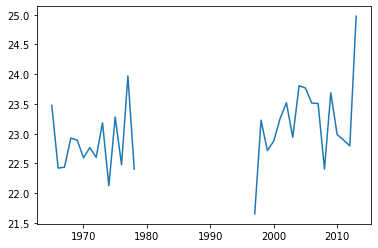

In [ ]:
plt.plot(df_pandas['Year'], df_pandas['avg_max_temp'])

In [ ]:
df = spark.createDataFrame(correct_lines, schema = ['product_id', 'station_id', 'year', 'month', 'day', 'max_temp', 'days_of_acc', 'quality'])

TypeError: ignored

In [ ]:
nsw_temp.groupBy().avg('max_temp')

AnalysisException: ignored